# Star Wars Survey

The team at fivethirtyeight conducted a survey using SurveyMonkey with a collective response of 835.

### Data Dictionary

| var_name      | description |
| :---        |    ---:|
| RespondentID       | anonymized ID       |
| Gender    | respondent's gender        |
| Age     | respondent's age        |
| Income     | respondent's income        |
| Education    | respondent's education level        |
| Location (Census Region)    | respondent's location        |
| Have you seen any of the 6 films in the Star Wars franchise?| Yes or No response      |
| Do you consider yourself to be a fan of the Star Wars film franchise?| Yes or No response        |

NOTE: There are other columns which involves selecting one or more boxes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [2]:
star_wars.head(20)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Inspecting columns
### 'Have you seen any of the 6 films in the Star Wars franchise?' & 'Do you consider yourself to be a fan of the Star Wars film franchise?'

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

There are some NA values in 'Do you consider yourself to be a fan of the Star Wars film franchise?'

These values can be represented as a boolean

#### Converting to boolean

In [6]:
mapper = {'Yes': True, 'No': False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(mapper)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(mapper)

### Which of the following Star Wars films have you seen? Please select all that apply. & Unnamed: 4-8

Looking at the head output above, these columns seem to state the film title if the option is selected or has NaN if the respondent does not select the option.

To clean this up, the column would need to replaced with intuitive title (the movie title) whilst converting the response to a binary (If title then True else False).

#### Renaming columns

In [7]:
col_mapper = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_ep1', 
              'Unnamed: 4': 'seen_ep2', 
              'Unnamed: 5': 'seen_ep3', 
              'Unnamed: 6': 'seen_ep4', 
              'Unnamed: 7': 'seen_ep5', 
              'Unnamed: 8': 'seen_ep6'}
star_wars = star_wars.rename(columns = col_mapper)

In [8]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
   

#### Converting values to boolean

In [9]:
def apply_map_1(element):
    if pd.isnull(element):
        return False
    else:
        return True

In [10]:
for i in ['seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6']:
    star_wars[i] = star_wars[i].apply(apply_map_1)

In [11]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. & Unnamed: 10-14

Looking at these columns, it seems the same movies as before is given to the respondent where they rank the movies with valkues ranging from 1-6 with 1 being most favourite and 6 being least favourite.

The columns seem to be in a intuitive format so these columns would only require renaming columns and changing columns to a numeric type.

#### Renaming columns

In [12]:
col_mapper_2 = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'rank_ep1',
                'Unnamed: 10': 'rank_ep2',
                'Unnamed: 11': 'rank_ep3', 
                'Unnamed: 12': 'rank_ep4', 
                'Unnamed: 13': 'rank_ep5', 
                'Unnamed: 14': 'rank_ep6'}
star_wars = star_wars.rename(columns = col_mapper_2)

In [13]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_ep1', 'seen_ep2', 'seen_ep3', 'seen_ep4', 'seen_ep5', 'seen_ep6',
       'rank_ep1', 'rank_ep2', 'rank_ep3', 'rank_ep4', 'rank_ep5', 'rank_ep6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'

In [14]:
star_wars[star_wars.columns[9:15]].head()

,rank_ep1,rank_ep2,rank_ep3,rank_ep4,rank_ep5,rank_ep6
0,3.0,2.0,1.0,4.0,5.0,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,5.0,6.0
3,5.0,6.0,1.0,2.0,4.0,3.0
4,5.0,4.0,6.0,2.0,1.0,3.0


#### Converting to numeric types

In [15]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

## Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her. & Unnamed: 16-28

Firstly, the column names would need to be changed to more intuitive titles. I believe the character name is the best column title.

The column values would also need to be cleaned by replacing the values with either `Favourable`, `Neutral`, `Not Favourable`, `Unknown` or `np.nan` as the 6 value system seem to be too granulated for analysis.
#### Column names

In [17]:
# Used method at bottom to obtain this map
col_mapper_3 = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.': 'dyk_han_solo',
                'Unnamed: 16': 'dyk_luke_skywalker', 
                'Unnamed: 17': 'dyk_yoda', 
                'Unnamed: 18': 'dyk_anakin_skywalker', 
                'Unnamed: 19': 'dyk_obi_wan',
                'Unnamed: 20': 'dyk_emp_palpatine', 
                'Unnamed: 21': 'dyk_darth_vader', 
                'Unnamed: 22': 'dyk_lando_calrissian', 
                'Unnamed: 23': 'dyk_boba_fett',
                'Unnamed: 24': 'dyk_c3po', 
                'Unnamed: 25': 'dyk_r2d2', 
                'Unnamed: 26': 'dyk_jarjarbinks', 
                'Unnamed: 27': 'dyk_padme_amidala',
                'Unnamed: 28': 'dyk_princess_leia'}

star_wars = star_wars.rename(columns = col_mapper_3)

#### Column values

In [18]:
star_wars['dyk_anakin_skywalker'].value_counts(dropna=False)

NaN                                            363
Somewhat favorably                             269
Very favorably                                 245
Neither favorably nor unfavorably (neutral)    135
Somewhat unfavorably                            83
Unfamiliar (N/A)                                52
Very unfavorably                                39
Name: dyk_anakin_skywalker, dtype: int64

In [19]:
def dyk_method(element):
    if (element == 'Somewhat favorably') | (element == 'Very favorably'):
        return 'Favourable'
    if (element == 'Neither favorably nor unfavorably (neutral)'):
        return 'Neutral'
    if (element == 'Somewhat unfavorably') | (element == 'Very unfavorably'):
        return 'Unfavourable'
    if (element == 'Unfamiliar (N/A)'):
        return 'Unknown'
    else:
        return np.nan

for i in col_mapper_3.values():
    star_wars[i] = star_wars[i].apply(dyk_method)

In [20]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6,rank_ep1,...,dyk_princess_leia,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Favourable,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unknown,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Favourable,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Favourable,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,3288388730,True,True,True,True,True,True,True,True,5.0,...,Favourable,Han,No,NaN,Yes,Female,18-29,"$0 - $24,999",Some college or Associate degree,East North Central
1182,3288378779,True,True,True,True,True,True,True,True,4.0,...,Favourable,I don't understand this question,No,NaN,Yes,Female,30-44,"$50,000 - $99,999",Bachelor degree,Mountain
1183,3288375286,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic
1184,3288373068,True,True,True,True,True,True,True,True,4.0,...,Favourable,Han,No,NaN,Yes,Female,45-60,"$100,000 - $149,999",Some college or Associate degree,East North Central


Now all the relevant rows for analysis has been cleaned.

## Analysis
### Rankings of the movies

In [21]:
star_wars.mean()[star_wars.columns[9:15]]

rank_ep1    3.732934
rank_ep2    4.087321
rank_ep3    4.341317
rank_ep4    3.272727
rank_ep5    2.513158
rank_ep6    3.047847
dtype: float64

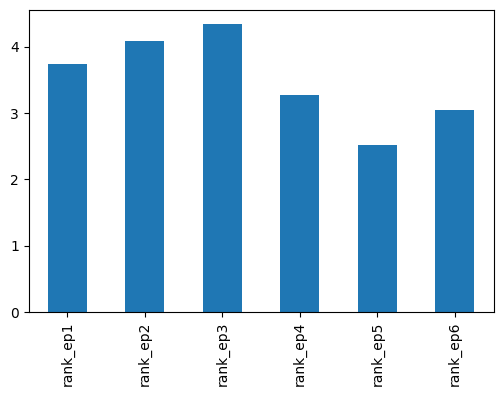

In [22]:
%matplotlib inline
star_wars.mean()[star_wars.columns[9:15]].plot.bar()

It seems that the movie which on average received the best ranking was Star Wars Episode V (recieving a ranking of 2.5) whilst the worst ranking movie is Star Wars Episode III recieving an average ranking of 4.3.

### Seen movies

In [23]:
star_wars.sum()[star_wars.columns[3:9]]

seen_ep1    673.0
seen_ep2    571.0
seen_ep3    550.0
seen_ep4    607.0
seen_ep5    758.0
seen_ep6    738.0
dtype: float64

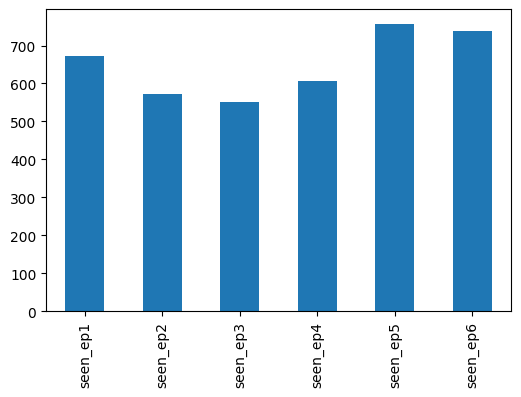

In [24]:
star_wars.sum()[star_wars.columns[3:9]].plot.bar()

It seems that the most well received movie is also the most viewed episode.
The opposite is true with the worst received movie.

The number of views for episode 6 almost matches episode 5.

## Analysis by group
### By gender

In [25]:
star_wars.groupby('Gender').mean()[star_wars.columns[9:15]]

,rank_ep1,rank_ep2,rank_ep3,rank_ep4,rank_ep5,rank_ep6
Gender,,,,,,
Female,3.429293,3.954660,4.418136,3.544081,2.569270,3.078086
Male,4.037825,4.224586,4.274882,2.997636,2.458629,3.002364


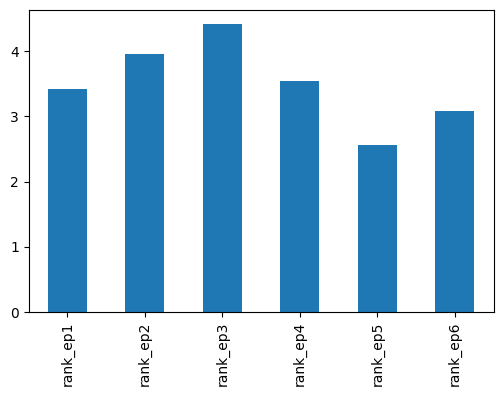

In [26]:
star_wars.groupby('Gender').mean().loc['Female',star_wars.columns[9:15]].plot.bar()

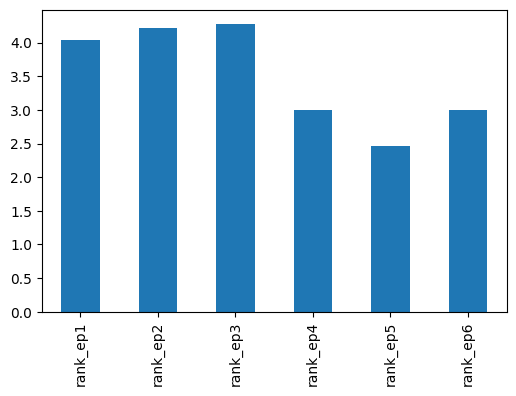

In [27]:
star_wars.groupby('Gender').mean().loc['Male',star_wars.columns[9:15]].plot.bar()

Females mean rankings for each movie followed very similar distribution to the whole sample size.

For males, there seems to be a close tie amongst the first three episodes for the worst viewed movie. There is a consensus that Episode 5 is the most well received movie.

Males hated the first two episodes more compared to how Females viewed the movies.

In [28]:
star_wars.groupby('Gender').sum()[star_wars.columns[3:9]]

,seen_ep1,seen_ep2,seen_ep3,seen_ep4,seen_ep5,seen_ep6
Gender,,,,,,
Female,298.0,237.0,222.0,255.0,353.0,338.0
Male,361.0,323.0,317.0,342.0,392.0,387.0


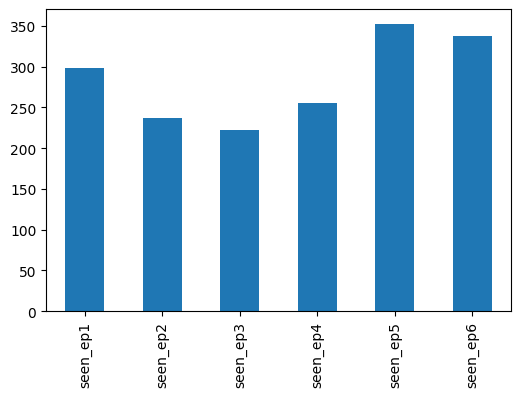

In [29]:
star_wars.groupby('Gender').sum().loc['Female',star_wars.columns[3:9]].plot.bar()

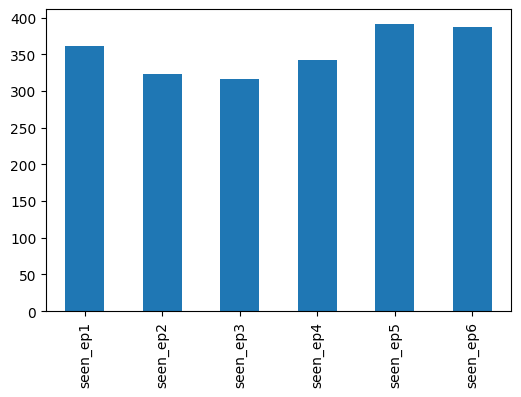

In [30]:
star_wars.groupby('Gender').sum().loc['Male',star_wars.columns[3:9]].plot.bar()

It seems overall more males have watched each and every title compared to Females.

NOTE: Important to keep in mind that more males may have taken the survey due to the nature of the movies.

## Analysis of opinions on characters

In [40]:
char_cols = star_wars.columns[15:29]

def val_count(value):
    output_list = []
    for i in char_cols:
        count_sum = (star_wars[i]==value).sum()
        output_list.append(count_sum)
    output = pd.Series(data = output_list, index = char_cols, name = '{}_count'.format(value).lower())
    return output

def per_count(value):
    output_list = []
    for i in char_cols:
        count_sum = (star_wars[i]==value).sum()
        total = star_wars[i].notnull().sum()
        percentage = round((count_sum/total)*100, 2)
        output_list.append(percentage)
    output = pd.Series(data = output_list, index = char_cols, name = '{}_per'.format(value).lower())
    return output

output_fav = per_count('Favourable')

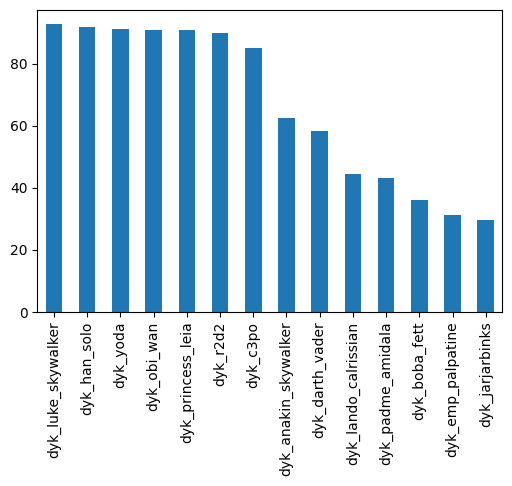

In [41]:
%matplotlib inline
output_fav.sort_values(ascending = False).plot.bar()

Luke Skywalker is the most liked character from the survey

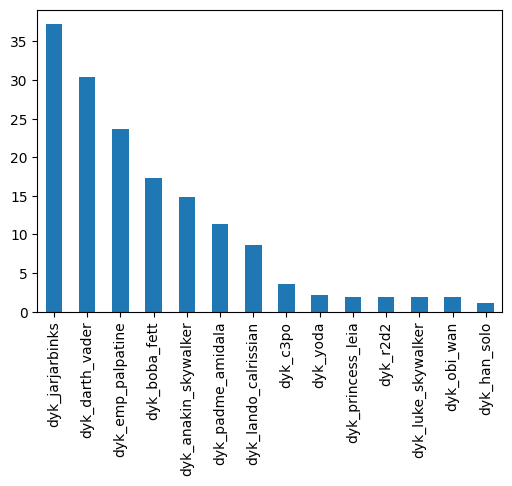

In [42]:
output_unfav = per_count('Unfavourable')
output_unfav.sort_values(ascending = False).plot.bar()

Out of the people who responded to this question, people least liked Jar Jar Binks.

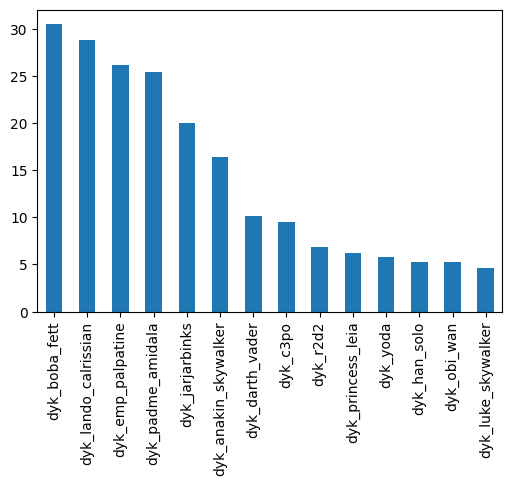

In [43]:
output_neut = per_count('Neutral')
output_neut.sort_values(ascending = False).plot.bar()

In [44]:
combined = pd.concat([output_unfav, output_fav], axis = 1)
controversial = output_fav-output_unfav
controversial = controversial.abs()
controversial.sort_values(ascending = True)

dyk_emp_palpatine        7.49
dyk_jarjarbinks          7.79
dyk_boba_fett           18.48
dyk_darth_vader         27.84
dyk_padme_amidala       31.82
dyk_lando_calrissian    35.85
dyk_anakin_skywalker    47.63
dyk_c3po                81.38
dyk_r2d2                88.07
dyk_princess_leia       88.74
dyk_yoda                88.93
dyk_obi_wan             89.09
dyk_han_solo            90.71
dyk_luke_skywalker      90.85
dtype: float64

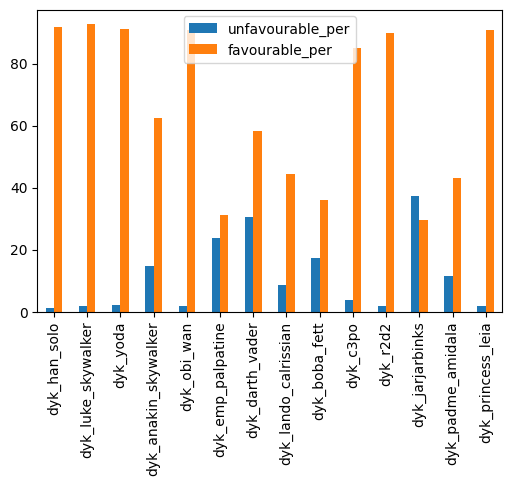

In [46]:
%matplotlib inline
combined.plot.bar()

It seems the most contraversial character in the movies is opinions on Emperor Palpatine.

In [16]:
# MISC: I want to use the article found on FiveThirtyEight.com and this dataset
# and the dataset to find out which character each column refers to for possibly
# future use

test = ['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28']

for i in test:
    percent_fav = (star_wars[i].value_counts()[['Very favorably','Somewhat favorably']].sum()/star_wars[i].value_counts().sum())*100
    percent_neutral = (star_wars[i].value_counts()['Neither favorably nor unfavorably (neutral)']/star_wars[i].value_counts().sum())*100
    print('{}: {} - {}'.format(i, percent_fav, percent_neutral))
    
# Assuming this was put in highest favourable on top, Princess Leia must be 17

Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.: 91.79734620024126 - 5.307599517490953
Unnamed: 16: 92.7797833935018 - 4.57280385078219
Unnamed: 17: 91.0950661853189 - 5.776173285198556
Unnamed: 18: 62.454434993924664 - 16.403402187120292
Unnamed: 19: 90.9090909090909 - 5.212121212121213
Unnamed: 20: 31.08108108108108 - 26.16707616707617
Unnamed: 21: 58.23244552058111 - 10.16949152542373
Unnamed: 22: 44.51219512195122 - 28.780487804878046
Unnamed: 23: 35.83743842364532 - 30.541871921182267
Unnamed: 24: 85.00604594921403 - 9.552599758162032
Unnamed: 25: 90.0 - 6.8674698795180715
Unnamed: 26: 29.476248477466505 - 19.97563946406821
Unnamed: 27: 43.12039312039312 - 25.429975429975432
Unnamed: 28: 90.67796610169492 - 6.174334140435835
